In [137]:
from colory.color import Color
from datetime import datetime
import duckdb as ddb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = ddb.read_parquet("../week3/rplace.parquet")

pixel_data = ddb.sql(f"""
    SELECT x, y, COUNT(*) as count
    FROM data
    GROUP BY x, y
    ORDER BY count DESC
""").fetchdf()

filtered_pixel_data = ddb.sql(f"""
    SELECT x, y, count
    FROM pixel_data
    WHERE x >= 300 AND x <= 400 AND y >= 500 AND y <= 600
""").fetchdf()

zero_zero_data = ddb.sql(f"""
    SELECT x, y, count
    FROM pixel_data
    WHERE x <= 250 AND  y <= 50
""").fetchdf()

# print(pixel_data[:3])



### Top 3 Placed Pixels
As show by the above query on the r/place dataset, the top 3 most placed pixels and their counts are as follows:
1. (0, 0)     98,807 times
2. (359, 564) 69,198 times
3. (349, 564) 55,230 times

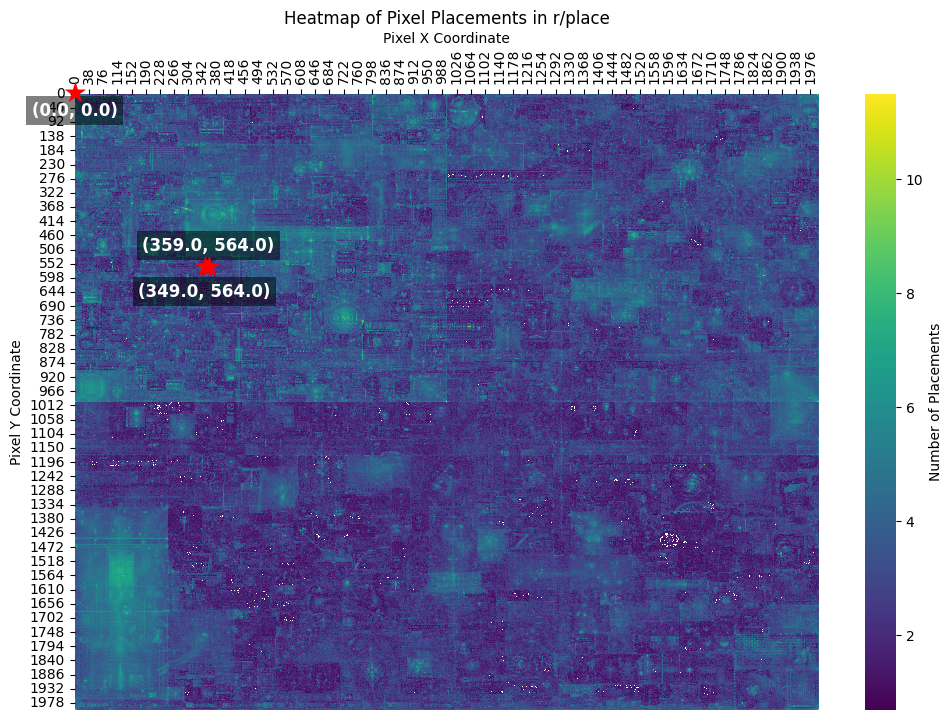

In [82]:
# Create a pivot table for the heatmap with log transformation
pixel_data['log_count'] = np.log1p(pixel_data['count'])
heatmap_data = pixel_data.pivot(index='y', columns='x', values='log_count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Number of Placements'})

# Find the top 3 pixels
top_pixels = pixel_data.nlargest(3, 'count')
    
# Different offsets for each annotation
offsets = [25, -100, 50]
for i, (_, row) in enumerate(top_pixels.iterrows()):
    x, y = row['x'], row['y']
    
    # Display the coordinates as text with an offset
    plt.text(
        x, y + offsets[i], f'({x}, {y})',  # Position the text with an offset
        color='white',  # Text color
        ha='center', va='top',  # Center the text
        fontsize=12, fontweight='bold',  # Text styling
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none')  # Background for better visibility
    )
    
    # Add a star symbol
    plt.text(
        x, y, '★',  # Star symbol
        color='red',  # Star color
        ha='center', va='center',  # Center the star
        fontsize=20  # Star size
    )

plt.title('Heatmap of Pixel Placements in r/place')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.gca().xaxis.set_label_position('top')
plt.xticks(rotation=90)

plt.show()

### Overall r/place Heatmap
The top 3 most placed pixels are highlighted with stars and annotated with their coordinates, given logarithmic scaling on pixel placement to emphasize the patterns present in the heatmap. We will go in to more detail about why these are placed in these areas once we have gathered more data about these specific locations, but take note of the vaguely apparent quadrants that have formed on the r/place data. A key thing to note was that the top left quadrant was initially the only quadrant available in the grid for a period of time, and soon was expanded to include the top right quadrant, and then finally the bottom half entirely for a total of 2 expansions from the original quadrant.

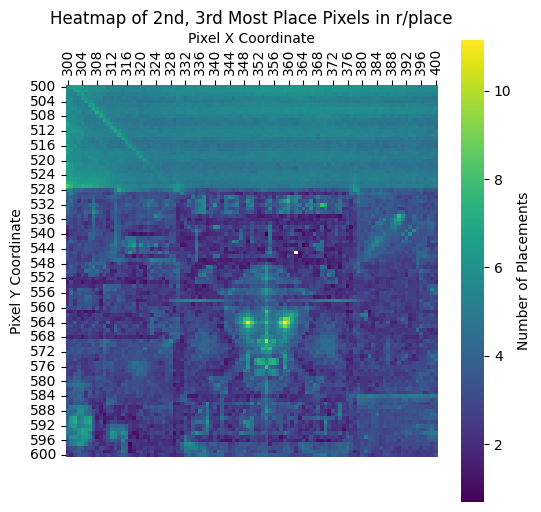

In [77]:
# Pivot the data to create a 2D matrix for the heatmap
filtered_pixel_data['logcount'] = np.log1p(filtered_pixel_data['count'])
heatmap_data = filtered_pixel_data.pivot(index='y', columns='x', values='logcount')

# Set up the figure size to scale up the heatmap
plt.figure(figsize=(6, 6))  # Adjust the size as needed for clarity

# Create the heatmap
sns.heatmap(
    heatmap_data,
    cmap='viridis',  # Choose a colormap (e.g., 'viridis', 'plasma', 'magma')
    square=True,     # Ensure pixels are square
    cbar_kws={'label': 'Number of Placements'}  # Add a color bar with a label
)


plt.title('Heatmap of 2nd, 3rd Most Place Pixels in r/place')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.gca().xaxis.set_label_position('top')
plt.xticks(rotation=90)


# Show the plot
plt.show()

### 2nd and 3rd Most Place Pixels
Here we can see a heatmap snapshot of a 100 x 100 view containing the 2nd and 3rd most placed pixels, again given logarithmic scaling for pixel placements. You can see that there appears to be a skull located near the center of the screen. The skull is in reference to a popular anime and manga known as One Piece, which details the adventures of a group of pirates (to put it drastically simply). The two eyes are the locations of the 2nd and 3rd most placed pixels, with the right eye (359, 564) just outplacing the left eye (349, 564) by a difference of nearly 14,000 placements.

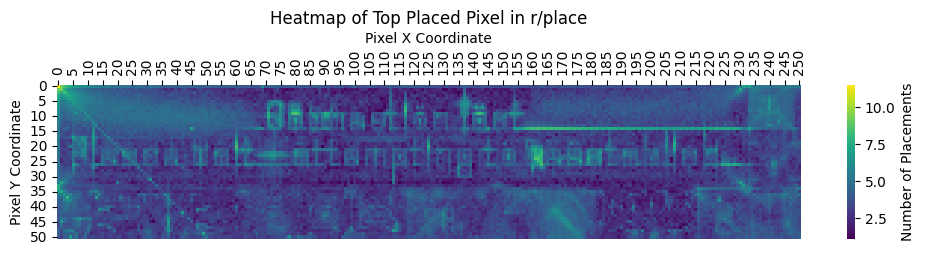

In [140]:
# Pivot the data to create a 2D matrix for the heatmap
zero_zero_data['logcount'] = np.log1p(zero_zero_data['count'])
heatmap_data = zero_zero_data.pivot(index='y', columns='x', values='logcount')

# Set up the figure size to scale up the heatmap
plt.figure(figsize=(12, 2))  # Adjust the size as needed for clarity

# Create the heatmap
sns.heatmap(
    heatmap_data,
    cmap='viridis',  # Choose a colormap (e.g., 'viridis', 'plasma', 'magma')
    square=False,     # Ensure pixels are square
    cbar_kws={'label': 'Number of Placements'}  # Add a color bar with a label
)


plt.title('Heatmap of Top Placed Pixel in r/place')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.gca().xaxis.set_label_position('top')
plt.xticks(rotation=90)


# Show the plot
plt.show()

### 1st Most Place Pixel
Here we can see the location of the 1st most placed pixel in a 100 x 100 view, which is located at (0,0). It logically makes sense to expect the 1st most placed pixel to be at (0, 0) when you consider that this was likely the starting point of the r/place pixel placing editor for all users who entered the site, but it is still interesting to observe the heatmap pattern radiating out from this location. The diagonal was especially popular, along with the x and y axis in both 0 directions. The pixel loation itself seems to part of a banner of sorts, and upon further research, I was able to find a reference to a popular free MMORPG known as RuneScape. This banner represents what pops up in the top left corner of a RuneScape player's screen when connection to the RuneScape server is lost, per https://2022.place-atlas.stefanocoding.me/#//160/30/3.452. The message is "Connection lost ... Please wait - attempting to reestablish". This would explain the appearance of words on the banner, along with the long stream of pixels placed where the elipses would normally go in this message. Users seemingly liked to extend it into a line that shows up very apparently on the heatmap.

C:\Users\Ethan\AppData\Local\Temp\ipykernel_2464\1598024865.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group['pixel_color'], rotation=45)
C:\Users\Ethan\AppData\Local\Temp\ipykernel_2464\1598024865.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group['pixel_color'], rotation=45)
C:\Users\Ethan\AppData\Local\Temp\ipykernel_2464\1598024865.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group['pixel_color'], rotation=45)


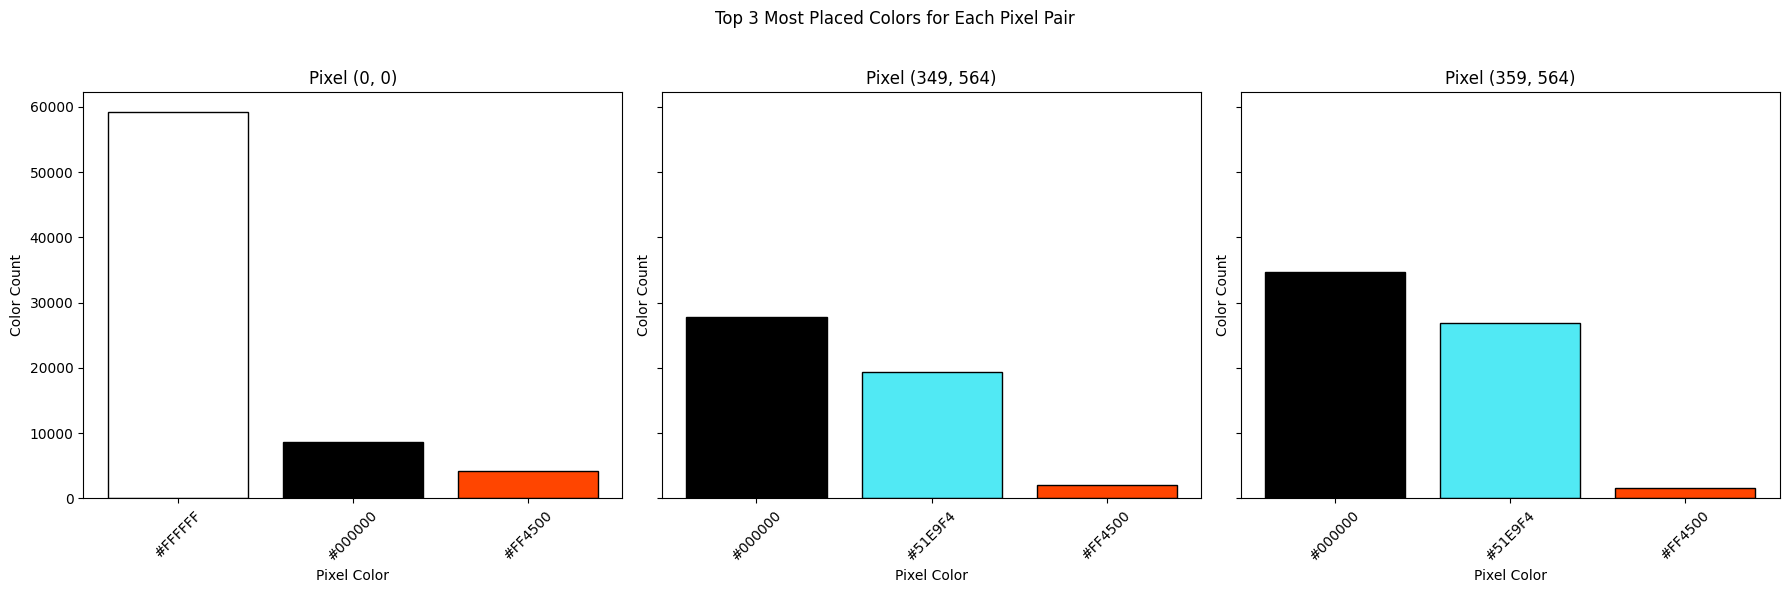

In [107]:
# grab top 3 pixel color placements over time for the top 3 most placed pixels
top_colors_per_pixel = ddb.sql(f"""
    WITH top_pixels AS (
        SELECT x, y
        FROM pixel_data
        ORDER BY count DESC
        LIMIT 3
    ),
    color_counts AS (
        SELECT d.x, d.y, d.pixel_color, COUNT(*) AS color_count
        FROM data d
        JOIN top_pixels tp ON d.x = tp.x AND d.y = tp.y
        GROUP BY d.x, d.y, d.pixel_color
    ),
    ranked_colors AS (
        SELECT x, y, pixel_color, color_count,
            ROW_NUMBER() OVER (PARTITION BY x, y ORDER BY color_count DESC) AS rank
        FROM color_counts
    )
    SELECT x, y, pixel_color, color_count
    FROM ranked_colors
    WHERE rank <= 3
    ORDER BY x, y, color_count DESC;
""").fetchdf()

# print(top_colors_per_pixel)

# Set up the figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each unique (x, y) pair and plot the top colors in separate subplots
for ax, (xy, group) in zip(axs, top_colors_per_pixel.groupby(['x', 'y'])):
    # Create a bar plot for each (x, y) pair
    ax.bar(group['pixel_color'], group['color_count'], color=group['pixel_color'], edgecolor='black')
    
    # Set the title and labels
    ax.set_title(f'Pixel ({xy[0]}, {xy[1]})')
    ax.set_xlabel('Pixel Color')
    ax.set_ylabel('Color Count')
    ax.set_xticklabels(group['pixel_color'], rotation=45)

# Set a common title for the entire figure
plt.suptitle('Top 3 Most Placed Colors for Each Pixel Pair')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

# Most Placed Colors in Top 3 Pixels
A query that returned the top 3 colors for each pixel shows a couple striking patterns. For the 2nd and 3rd place pixels, we can see that there was a battle between a light blue and a black coloring. Seeing as this was the center of the eyes for the skull, it leads one to wonder why someone (or a large group of some people) would want to change such a minute detail in an otherwise untampered-with image? Hmmmm... as for the 1st placed pixel (0, 0), we can see th e large majority of pixels placed in this location were white, along with some black. The black pixels would make sense, as we have already established that this pixel location is part of a black message box from RuneScape, but this makes the high number of white pixels even more curious. One key note for the r/place data was that, on the last few hours of the canvas' lifetime, the r/place moderators only allowed the color white to be placed. This leads to another question: when were these white pixels placed? One can assume that the battle of light blue and black colors was ongoing (mainly because there isn't a reason to assume that it wasn't), but the prevalance of the color white in the most popular pixel location does suspiciously seem like it could be related to the last couple of hours on r/place.

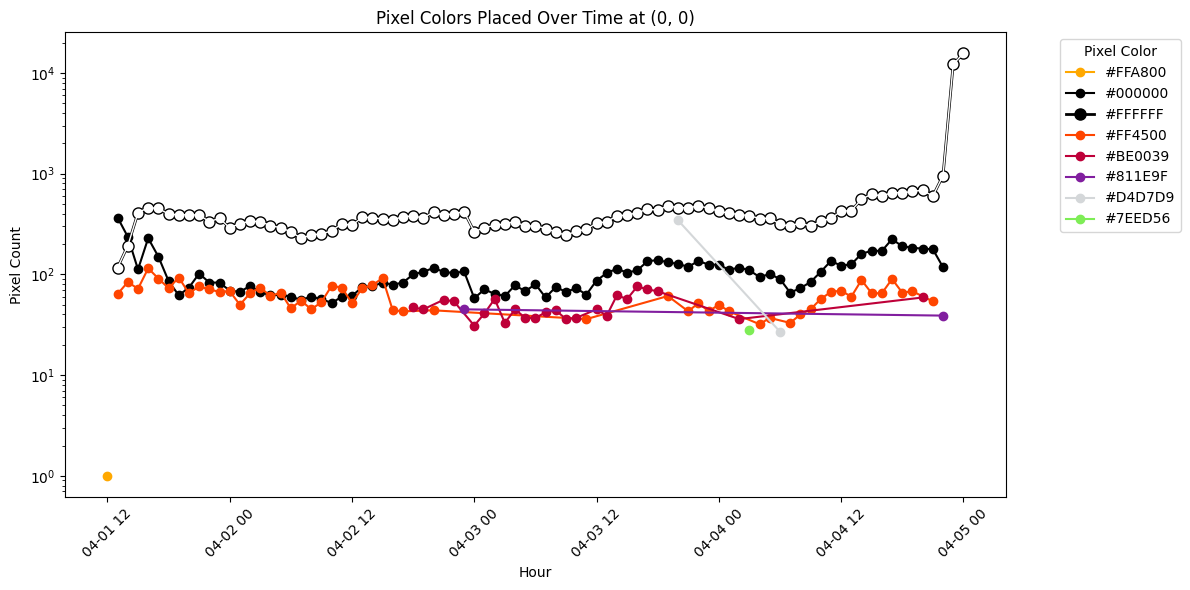

In [123]:
# pixel placement over time for (0, 0)
color_over_time = ddb.sql(f"""
    WITH pixel_by_hour as (
        SELECT 
        DATE_TRUNC('hour', timestamp) AS hour,
        pixel_color,
        COUNT(*) AS pixel_count
        FROM data
        WHERE x = 0 AND y = 0
        GROUP BY hour, pixel_color
        ORDER BY hour, pixel_color
    ), ranks as (
        SELECT hour, pixel_color, pixel_count,
            ROW_NUMBER() OVER (PARTITION BY hour ORDER BY pixel_count DESC) AS rank
        FROM pixel_by_hour
        ORDER BY hour, rank
    )
    SELECT hour, pixel_color, pixel_count
    FROM ranks
    WHERE rank <= 3
""").fetchdf()


# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each unique color and plot its counts over time
for color in color_over_time['pixel_color'].unique():
    color_data = color_over_time[color_over_time['pixel_color'] == color]

    # Check if the color is white and plot with an outline if it is
    if color == '#FFFFFF':
        # Plot the outline in a darker color with larger markers
        plt.plot(color_data['hour'], color_data['pixel_count'], 
                 marker='o', label=color, color='black', 
                 markersize=8, linewidth=2, markeredgecolor='black', markerfacecolor='black')
        # Plot the actual white line on top
        plt.plot(color_data['hour'], color_data['pixel_count'], marker='o', color=color, linewidth=1)
    else:
        plt.plot(color_data['hour'], color_data['pixel_count'], marker='o', label=color, color=color)


# Set logarithmic scale for the y-axis
plt.yscale('log')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Pixel Count')
plt.title('Pixel Colors Placed Over Time at (0, 0)')
plt.xticks(rotation=45)
plt.legend(title='Pixel Color', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


### Top 3 Colors for each Hour at (0, 0)
The graph here shows the top three colors placed, ranked by count for that hour. The white line may be a bit hard to see, but I made sure to try and outline it in black so the line at least becomes a bit more visible. As we can see, the most prominent colors over time seem to be white, black, and a mixture of an orange, scarlet, and a couple other outliers. This graph seemingly confirms our suspicions regarding the white pixel placement, as we can see the placements of white all begin to congregate towards the end despite white also having a more prominent placement throughout the entire r/place uptime. It then appears to be a combination of factors: the popularity of white in this location was already established, but its dominance becomes even more pronounced when white becomes the only color option for this spot too.

In [134]:
# grab unique users for each pixel spot
users_per_pixel = ddb.sql(f"""
    WITH top_pixels AS (
        SELECT x, y
        FROM pixel_data
        ORDER BY count DESC
        LIMIT 3
    )
    SELECT d.x, d.y, COUNT(DISTINCT d.user_id_numeric) as user_counts
    FROM data d
    JOIN top_pixels tp ON d.x = tp.x AND d.y = tp.y
    GROUP BY d.x, d.y
""").fetchdf()

# print(users_per_pixel)

     x    y  user_counts
0    0    0        83906
1  349  564        42147
2  359  564        48906


### Unique Users for Top 3 Pixels
1. (0, 0): 83906
2. (359, 564): 48906
3. (349, 564): 42147
At first glance, this data does not seem much different compared to that returned from the initial most-placed-pixel-locations query, but an outside source from https://www.reddit.com/r/OnePiece/comments/txm173/one_piece_is_first_place_in_rplace_as_a_community/ indicates that the One Piece community had nearly 54,000 unique users backing its efforts on r/place, which closely aligns with the unique user count for the two pixels placed at both eyes of the skull created by that community. That's the reason I went after the unique users specifically. This lends credence to the theory that the One Piece community was largely responsible for 2 of the top 3 most placed pixels in r/place 2022. As for the (0, 0) spot, there is not necessarily any correlation to unique user count at this location based on a specific group, save for the RuneScape community in black pixel placements.

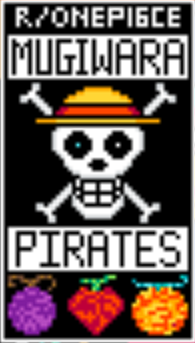

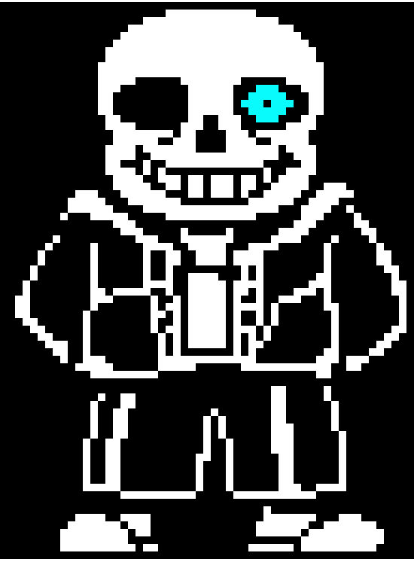

### Why Blue and Black?
On first glance, the battle for light blue vs. black pixels appears to be likely a result of a small war between two groups of users, one of which was the One Piece community (the group currently occupying this space) and the Undertale community (the group trolling the eye color of the skull). What is remarkable is that I could not find a lot of documentation on the undertale community in relation to r/place 2022 much at all, yet they had such a prevalence in the form of heatmap pixel placement. Enough to establish 2 of the top 3 pixels in an invigorating battle between the tough, gritty One Piece fandom. I think part of this lies in the fact that the amount of pixels needed to imbue a reference to Undertale was so small that it was done by a variety of people who had either played the game a couple times in passing (with I theorize was the majority), or actually were huge fans of the game and maintained a driving urge to troll these pixels. To inform my theory, let's run the a query to find the amount of unique users that placed the light blue pixel in either of the eyes.

In [147]:
# grab unique users for each pixel spot
undertale_users_per_pixel = ddb.sql(f"""
    WITH top_pixels AS (
        SELECT x, y
        FROM pixel_data
        ORDER BY count DESC
        LIMIT 2 OFFSET 1
    )
    SELECT d.x, d.y, COUNT(DISTINCT d.user_id_numeric) as user_counts
    FROM data d
    JOIN top_pixels tp ON d.x = tp.x AND d.y = tp.y
    WHERE d.pixel_color = '#51E9F4'
    GROUP BY d.x, d.y
""").fetchdf()

# print(undertale_users_per_pixel)

     x    y  user_counts
0  349  564        15475
1  359  564        19816


1. (359, 564): 19816
2. (349, 564): 15475
Considering the amount of unique users placing those light blue pixels is still relatively large in the grand scheme of one color for one pixel, it's safe to say that there was at least a small gathering of Undertale fans that fought the long fight in order to continue their trolling. This does not account for possible overlap between One Piece fans placing light blue, or Undertale fans placing black, or fans of either placing a the same color redundantly at that spot. On one hand, had this number been smaller, this would have been evidence of an even more determined undertale community that was smaller in size but more dedicated to the fight, but the size of these numbers could equally indicate that there was a large amount of people not necessarily tied to the same community that just wanted to troll. Without knowing the preferences of each individual user, it's hard to say for sure.

## Conclusion: 5 Whys
After an in depth exploration of the data, it's safe to group the top 3 pixels into 2 separate groups: the (0, 0) group, and the One Piece / Undertale group. Let's go over some concrete conclusions and some possible reasons for why we the conclusions have come to be.
### (0, 0) group
The (0, 0) pixel was the most place pixel.
1. Why? User picked this location the most often to place a pixel.
2. Why? The default pixel placement upon entering r/place was likely (0, 0).
3. Why? It doesn't make a lot of sense to have the default pixel placement start anywhere else on the grid.
4. Why? (0, 0) Symbolically represents the 'origin' of every graph or grid, and the denotation of origin can be stated to be the start of a particular thing.
5. Why? The origin of the word origin is the Latin word originem, meaning "rise, beginning, or source."

The (0, 0) pixel was painted white most frequently overall.
1. Why? Users chose the color white the most when painting this spot.
2. Why? Towards the end of the r/place event, the only color available to place was the color white.
3. Why? Moderators wanted to create a united end to the event, allowing everyone to come together for one single purpose of erasing the canvas.
4. Why? To create a sense of community one last time for an event that showed just how impactful different communities of people can be if they work together to achieve a common goal.
5. Why? To emphasize the purpose of this piece of art, or at least provide users with a way to create a purpose within it.

### One Piece / Undertale group
The two pixels, (359, 564) and (349, 564) are the 2nd and 3rd most place pixels, respectively.
1. Why? Users chose to place those pixels there very frequently.
2. Why? There were two groups of users that fought over the details of these pixels.
3. Why? The One Piece group initially took over this space, and the Undertale group wanted to make themselves heard either through trolling, determination, or both.
4. Why? The minute detail of the eyes having one pixel colored in the center made it easy for the Undertale group to show their presence
5. Why? Changing one pixel is very fast, and considering the size of the groups that were fighting over it, it makes sense that either pixel could become a hotspot given the circumstances.

The top two colors placed were black and light blue in both eyes.
1. Why? Users chose to place those colors more frequently in those locations.
2. Why? The color of the One Piece skull's eye is plain black on the flag, while the color symbolically representing the main character in Undertale is known to be a lighter blue.
3. Why? The flag in One Piece is a skull, and so eyes are not existent and thus black makes sense. The Undertale character Sans has a special eye that becomes lighter blue at some point in the game.
4. Why? Black makes sense because nonexistence is often tied to the void, or darkness. The light blue of Sans' eye is likely tied to the 'patience' trait, a feature in the game that has a color scheme of light blue/cyan.
5. Why? The void can be describes as void of color, and the absence of color is usually known to be black. The patience trait in undertale coincides with Sans' more powerful abilities that require you to be patient and precise when fighting him.

## Extra Notes
### (0, 0) group
It is also likely that the white color was default for user placement, but that is a separate tangent of the why's and I felt it more insightful to explore the whys which related to the end of the event. Especially since we saw the only-white option as a driving factor in the last couple of hours for white pixel placements, especially at the origin. This could also have been people realizing they can no longer place a colored pixel, and not caring particularly about where it goes now that it was not colored, showing a shift in values based on the taking away of a privilege. The Runescape community also contributed to the placement of this pixel, but not particularly for the color white, and so we can't necessarily cite them for this particular reason. But they most certainly had an impact on top of all the default placements for creating the most placed pixel location. A big why for this group would be that the location of the connection banner is located at the top left of the screen, just like it is in r/place.

### One Piece / Undertale Group
The eye on the right (when facing Sans' character model) is more commonly known to show the cyan / light blue color, and this further explains why the 2nd most colored pixel happens to be shifted 10 pixels to the right of the 3rd most colored pixel. But generally, both eyes can signify Undertale, because the association is tied moreso to the color of the eyes and not necessarily which eye it is. A orange/red color was also somewhat prominent in the eyes, but was not nearly as popular. The red color is generally symbolic of evil or scary eyes, and not necessarily tied to one group's efforts.